In [164]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [165]:
actress_data = pd.read_json("actress.json")
actress_data["age"] = 2021 - pd.DatetimeIndex(actress_data["birthday"]).year
actress_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11186 entries, 0 to 11185
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11186 non-null  int64  
 1   name         11186 non-null  object 
 2   japanName    11186 non-null  object 
 3   hiragana     11186 non-null  object 
 4   bust         6456 non-null   float64
 5   waist        6436 non-null   float64
 6   hip          6428 non-null   float64
 7   height       5012 non-null   float64
 8   birthday     4031 non-null   object 
 9   blood_type   3171 non-null   object 
 10  hobby        3730 non-null   object 
 11  prefectures  4471 non-null   object 
 12  age          4031 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 1.1+ MB


In [166]:
actress_data.head()

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures,age
0,3,Kitagawa Yui,北川ゆい,きたがわゆい,95.0,60.0,88.0,NaN,1980-12-14,AB,クラシックバレエ,None,41.0
1,4,Akira,Akira,あきら,90.0,58.0,86.0,157.0,1978-08-15,A,水泳、ゴルフ,東京都,43.0
2,6,Cocolo,COCOLO,こころ,96.0,55.0,85.0,168.0,1982-07-07,B,パソコン,茨城県,39.0
3,8,Saiko,Saiko,さいこ,80.0,59.0,82.0,162.0,1983-04-12,O,料理、大食い,東京都,38.0
4,11,Aida Momo,あいだもも,あいだもも,82.0,55.0,89.0,162.0,1970-06-18,A,エアロビクス,東京都,51.0


In [167]:
df = actress_data[["bust", "waist", "hip", "age"]]
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3938 entries, 0 to 11185
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bust    3938 non-null   float64
 1   waist   3938 non-null   float64
 2   hip     3938 non-null   float64
 3   age     3938 non-null   float64
dtypes: float64(4)
memory usage: 153.8 KB


In [168]:
df.head()

,bust,waist,hip,age
0,95.0,60.0,88.0,41.0
1,90.0,58.0,86.0,43.0
2,96.0,55.0,85.0,39.0
3,80.0,59.0,82.0,38.0
4,82.0,55.0,89.0,51.0


In [169]:
ac_np = df.to_numpy()
ac_np

array([[95., 60., 88., 41.],
       [90., 58., 86., 43.],
       [96., 55., 85., 39.],
       ...,
       [80., 60., 83., 41.],
       [88., 58., 87., 37.],
       [88., 59., 86., 37.]])

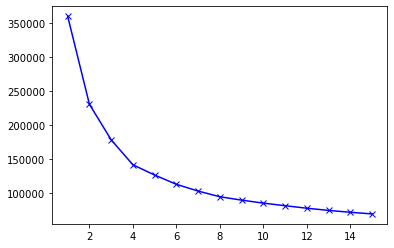

In [170]:
K = range(1,16)
list_sum_distances = []

for k in K:
    k_mean = KMeans(n_clusters=k)
    k_mean.fit(ac_np)
    list_sum_distances.append(k_mean.inertia_)
    
plt.plot(K, list_sum_distances, "bx-")
plt.show()

In [171]:
# Choose k = 4
k_mean = KMeans(n_clusters=4)
k_mean.fit(ac_np)
result = k_mean.labels_

In [184]:
print(type(result))
result.shape

<class 'numpy.ndarray'>


(3938,)

In [185]:
set(result)

{0, 1, 2, 3}

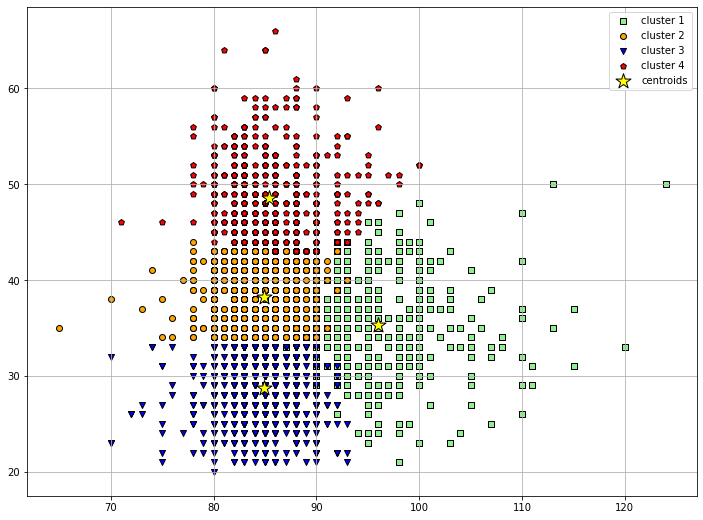

In [186]:
plt.figure(figsize=(12,9))

plt.scatter(
    ac_np[result==0, 0], ac_np[result==0,3],
    c="lightgreen",
    marker="s", edgecolor="black",
    label="cluster 1"
)

plt.scatter(
    ac_np[result==1, 0], ac_np[result==1,3],
    c="orange",
    marker="o", edgecolor="black",
    label="cluster 2"
)

plt.scatter(
    ac_np[result==2, 0], ac_np[result==2,3],
    c="blue",
    marker="v", edgecolor="black",
    label="cluster 3"
)

plt.scatter(
    ac_np[result==3, 0], ac_np[result==3,3],
    c="red",
    marker="p", edgecolor="black",
    label="cluster 4"
)

plt.scatter(
    k_mean.cluster_centers_[:,0], k_mean.cluster_centers_[:,3],
    s=250, marker="*",
    c="yellow", edgecolor="black",
    label="centroids"
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [193]:
df1 = actress_data[["id", "name", "japanName", "bust", "waist", "hip", "age"]]
df1 = df1.dropna()

df1["cluster"] = result
df1.shape

(3938, 8)

In [194]:
df1.head()

,id,name,japanName,bust,waist,hip,age,cluster
0,3,Kitagawa Yui,北川ゆい,95.0,60.0,88.0,41.0,0
1,4,Akira,Akira,90.0,58.0,86.0,43.0,1
2,6,Cocolo,COCOLO,96.0,55.0,85.0,39.0,0
3,8,Saiko,Saiko,80.0,59.0,82.0,38.0,1
4,11,Aida Momo,あいだもも,82.0,55.0,89.0,51.0,3


In [195]:
def recommend(vong1, vong2, vong3, tuoi):
    arr = np.array([[vong1, vong2, vong3, tuoi]])
    pred = k_mean.predict(arr)
    return df1[df1["cluster"] == pred[0]][:10]

In [196]:
vong1 = 90
vong2 = 55
vong3 = 90
tuoi = 20
recommend(vong1, vong2, vong3, tuoi)

,id,name,japanName,bust,waist,hip,age,cluster
119,181,Minami,みなみ,80.0,60.0,85.0,33.0,2
475,12466,Hara Saori,原紗央莉,85.0,61.0,85.0,33.0,2
477,12478,Misaki Aya,美咲あや,85.0,60.0,85.0,25.0,2
867,14671,Harada Zyun,原田ジュン,86.0,62.0,92.0,33.0,2
871,14754,Nagase Mami,長瀬麻美,88.0,60.0,90.0,29.0,2
1522,18608,Maesima Miho,前嶋美歩,88.0,58.0,83.0,32.0,2
1586,19087,Morino Kotori,森野琴梨,80.0,55.0,82.0,33.0,2
1600,19215,Tuzi Azuki,辻あずき,85.0,58.0,85.0,33.0,2
1603,19218,Ichika,ICHIKA,88.0,58.0,89.0,33.0,2
1718,19736,Satou Rola,佐藤ローラ,84.0,61.0,89.0,33.0,2


In [197]:
def find_by_name(name):
    return df1[df1.name.str.contains(name, case=False)]

In [198]:
find_by_name("mikami")

,id,name,japanName,bust,waist,hip,age,cluster
96,1119,Mikami Ran,三上蘭,84.0,59.0,86.0,39.0,1
625,13127,Mikami Runa,美神ルナ,88.0,58.0,85.0,37.0,1
1762,20124,Mikami Seri,美上セリ,83.0,58.0,82.0,34.0,1
3720,1000282,Mikami Airi,三上あいり,85.0,58.0,84.0,33.0,2
6541,1025773,Mikami Aya,美神あや,88.0,58.0,90.0,37.0,1
7237,1030262,Mikami Yua,三上悠亜,84.0,58.0,88.0,28.0,2
7948,4690,Mikami Syouko,三上翔子,83.0,61.0,88.0,39.0,1


In [214]:
def recommend_by_id(id):
    actress = df1[df1.id==id].iloc[0]
    return recommend(actress.bust, actress.waist, actress.hip, actress.age)

In [215]:
recommend_by_id(4690)

,id,name,japanName,bust,waist,hip,age,cluster
1,4,Akira,Akira,90.0,58.0,86.0,43.0,1
3,8,Saiko,Saiko,80.0,59.0,82.0,38.0,1
6,17,Aduki Miyu,あづき美由,85.0,60.0,88.0,39.0,1
8,25,Isikawa Airi,いしかわ愛里,86.0,58.0,90.0,39.0,1
10,32,Usami Kyouka,うさみ恭香,83.0,58.0,85.0,41.0,1
11,33,Utida Mahiro,うちだまひろ,88.0,59.0,88.0,40.0,1
13,43,Kaguyahime,かぐやひめ,85.0,60.0,87.0,40.0,1
14,46,Katori Konomi,かとりこのみ,90.0,58.0,84.0,41.0,1
16,60,Kusunoki Kotomi,くすのき琴美,84.0,58.0,85.0,40.0,1
18,63,Kuramoto Mai,くらもとまい（葉月ありさ）,83.0,57.0,85.0,42.0,1
